<img src="https://datasets.activeloop.ai/wp-content/uploads/2022/09/PlantVillage-dataset-main-image.webp" alt="Your Image" width="1100"/>


# Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split


# Tensorflow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard  
from tensorflow.keras.utils import normalize
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.metrics import Precision
# metrics
from sklearn.metrics import classification_report, confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## The Data

#### `Train Data`

In [2]:
train_path = r'/kaggle/input/tomatoleaf/tomato/train'

Categories = [Class for Class in os.listdir(train_path)]

train_data = []

for category in Categories:
    label = Categories.index(category)
    path = os.path.join(train_path, category)
    for img in os.listdir(path):
        image = os.path.join(path, img)
        try:
            the_img = cv2.imread(image)
            the_img = cv2.resize(the_img, (150, 150))
            train_data.append([the_img, label])
        except Exception as ex:
            pass

#### `Test Data`

In [3]:
test_path = r"/kaggle/input/tomatoleaf/tomato/val"

Categories = [Class for Class in os.listdir(test_path)]

test_data = []

for category in Categories:
    label = Categories.index(category)
    path = os.path.join(test_path, category)
    for img in os.listdir(path):
        image = os.path.join(path, img)
        try:
            the_img = cv2.imread(image)
            the_img = cv2.resize(the_img, (150, 150))
            test_data.append([the_img, label])
        except Exception as ex:
            pass

## Split The Data

In [4]:
# On The Train Data
X = []
y = []

for features, labels in train_data:
    X.append(features)
    y.append(labels)
    
X = np.array(X) # Features
y = np.array(y) # Targets

In [5]:
# Split To Train and Validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.13, random_state=42, shuffle=True)

In [6]:
# On The Test Data
X_test = []
y_test = []

for features, labels in test_data:
    X_test.append(features)
    y_test.append(labels)
    
X_test = np.array(X_test) # Features
y_test = np.array(y_test) # Targets

In [7]:
# shapes
print(f"X_train shape is {X_train.shape}")
print(f"y_train shape is {y_train.shape}")
print(f"X_valid shape is {X_valid.shape}")
print(f"y_valid shape is {y_valid.shape}")
print(f"X_test shape is {X_test.shape}")
print(f"y_test shape is {y_test.shape}")

X_train shape is (8700, 150, 150, 3)
y_train shape is (8700,)
X_valid shape is (1300, 150, 150, 3)
y_valid shape is (1300,)
X_test shape is (1000, 150, 150, 3)
y_test shape is (1000,)


## Exploratory Data Analysis (EDA)

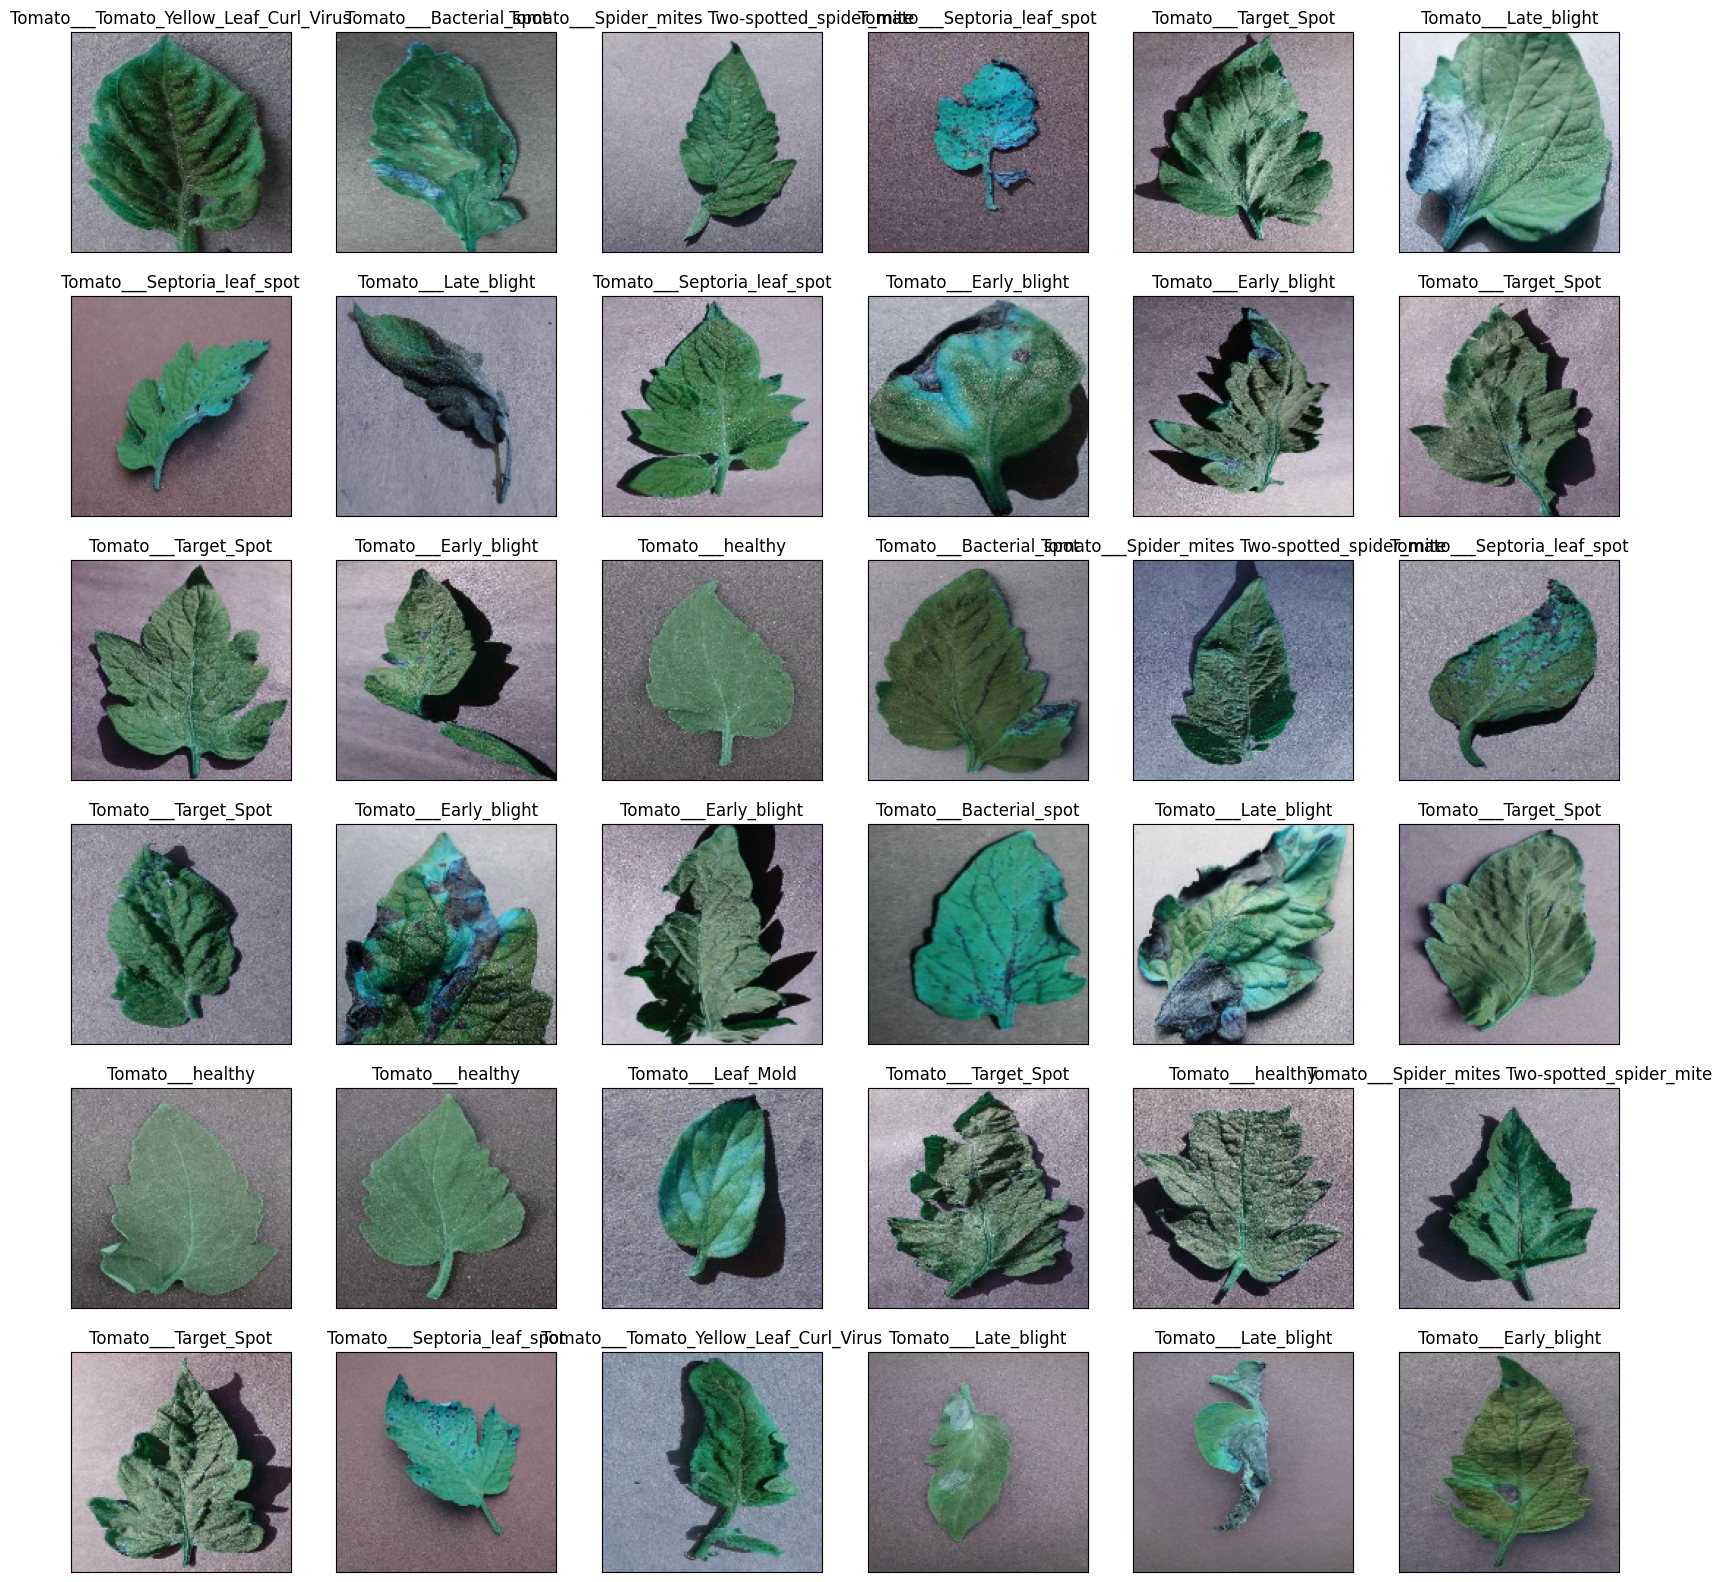

In [8]:
plt.figure(figsize=(20, 20))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.imshow(X_train[i])
    plt.title(f"{Categories[y_train[i]]}")
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [9]:
y_train

array([4, 5, 9, ..., 5, 0, 7])

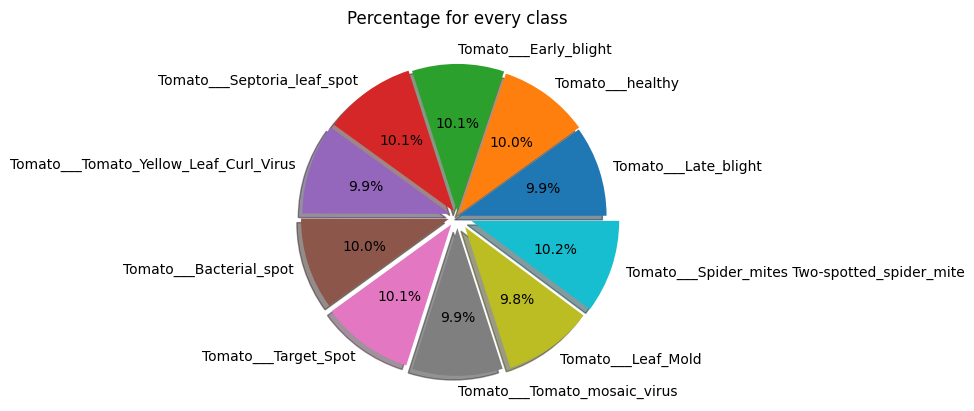

In [10]:
plt.pie([len(y_train[y_train==0]), len(y_train[y_train==1]), len(y_train[y_train==2]), len(y_train[y_train==3]),
        len(y_train[y_train==4]), len(y_train[y_train==5]), len(y_train[y_train==6]), len(y_train[y_train==7]), 
         len(y_train[y_train==8]), len(y_train[y_train==9])], 
       labels=Categories, autopct="%1.1f%%", shadow=True, explode=[i for i in np.arange(0.01, 0.11, 0.01)])

plt.title("Percentage for every class")
plt.show()

#### `Class Distribution Bar Chart`

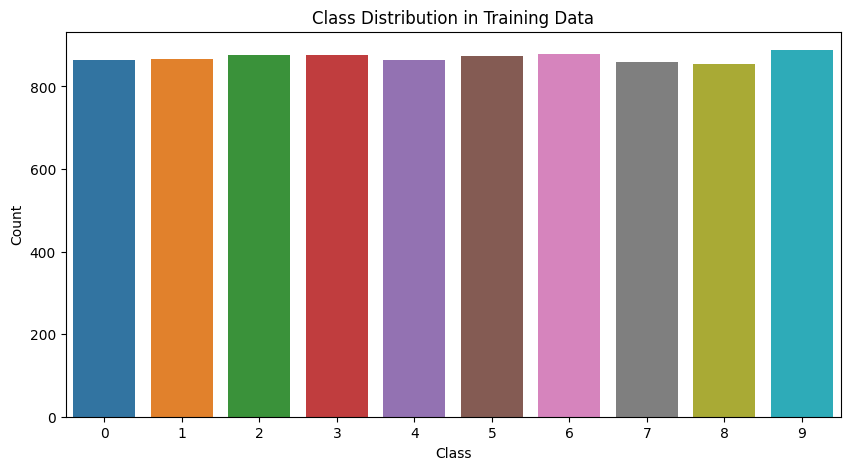

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### `Image Statistics`

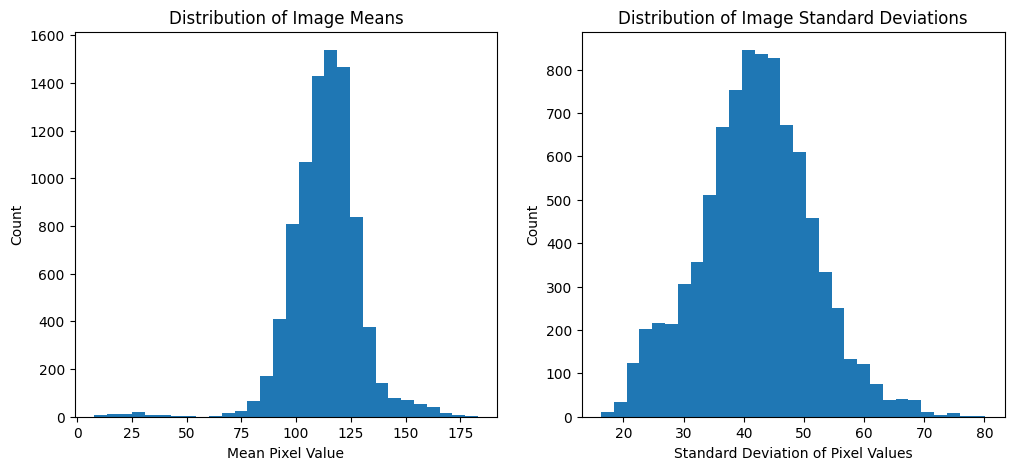

In [12]:
image_means = [np.mean(image) for image in X_train]
image_stds = [np.std(image) for image in X_train]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(image_means, bins=30)
plt.title('Distribution of Image Means')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(image_stds, bins=30)
plt.title('Distribution of Image Standard Deviations')
plt.xlabel('Standard Deviation of Pixel Values')
plt.ylabel('Count')

plt.show()

#### `distribution of pixel intensities`

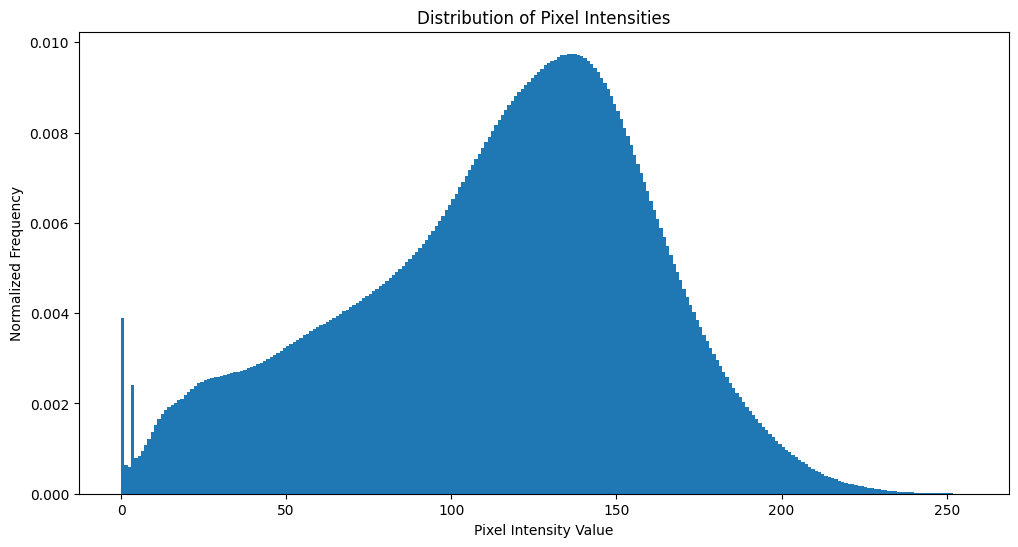

In [13]:
flattened_images = np.concatenate([image.flatten() for image in X_train])

# Plot the distribution of pixel intensities
plt.figure(figsize=(12, 6))
plt.hist(flattened_images, bins=256, range=[0, 256], density=True)
plt.title('Distribution of Pixel Intensities')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Normalized Frequency')
plt.show()

#### `comparing average pixel intensity`

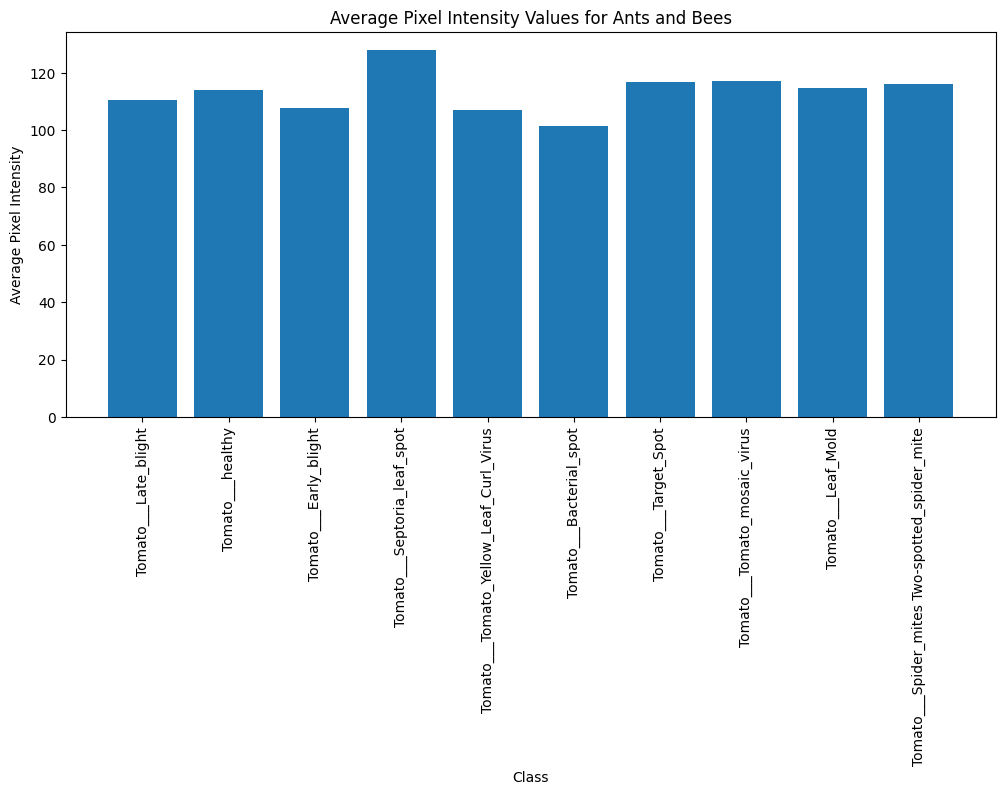

In [14]:
# ClassOne_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 0])
# ClassTow_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 1])
# Class3_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 2])
# Class4_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 3])
# Class5_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 4])
# Class6_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 5])
# Class7_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 6])
# Class8_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 7])
# Class9_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 8])
# Class10_average_intensity = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == 9])

# Plot bar chart comparing average pixel intensity values
labels = Categories
values = []

for i in range (10):
    Class = np.mean([np.mean(image) for image, label in zip(X_train, y_train) if label == i])
    values.append(Class)
    
plt.figure(figsize=(12, 5))
plt.bar(labels, values) 
plt.title('Average Pixel Intensity Values for Ants and Bees')
plt.xlabel('Class')
plt.ylabel('Average Pixel Intensity')
plt.xticks(rotation=90)
plt.show()

## Normalization

In [15]:
# make the range of piexls between 0 & 1
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

## Data Augmentation

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

## Model

In [17]:
model = Sequential([
    data_augmentation,
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=X_train[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax'),
])

In [18]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [19]:
# Define callbacks 
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50
544/544 [==============================] - ETA: 0s - loss: 2.0208 - accuracy: 0.2580
Epoch 1: val_accuracy improved from -inf to 0.46154, saving model to best_model.h5
544/544 [==============================] - 16s 17ms/step - loss: 2.0208 - accuracy: 0.2580 - val_loss: 1.6675 - val_accuracy: 0.4615
Epoch 2/50
  9/544 [..............................] - ETA: 6s - loss: 1.7334 - accuracy: 0.3194

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


541/544 [============================>.] - ETA: 0s - loss: 1.5606 - accuracy: 0.4418
Epoch 2: val_accuracy improved from 0.46154 to 0.55462, saving model to best_model.h5
544/544 [==============================] - 8s 14ms/step - loss: 1.5586 - accuracy: 0.4425 - val_loss: 1.2977 - val_accuracy: 0.5546
Epoch 3/50
541/544 [============================>.] - ETA: 0s - loss: 1.3021 - accuracy: 0.5352
Epoch 3: val_accuracy did not improve from 0.55462
544/544 [==============================] - 8s 14ms/step - loss: 1.3013 - accuracy: 0.5356 - val_loss: 1.2841 - val_accuracy: 0.5423
Epoch 4/50
541/544 [============================>.] - ETA: 0s - loss: 1.1721 - accuracy: 0.5832
Epoch 4: val_accuracy improved from 0.55462 to 0.60231, saving model to best_model.h5
544/544 [==============================] - 8s 14ms/step - loss: 1.1719 - accuracy: 0.5836 - val_loss: 1.0844 - val_accuracy: 0.6023
Epoch 5/50
541/544 [============================>.] - ETA: 0s - loss: 1.0693 - accuracy: 0.6255
Epoch 5:

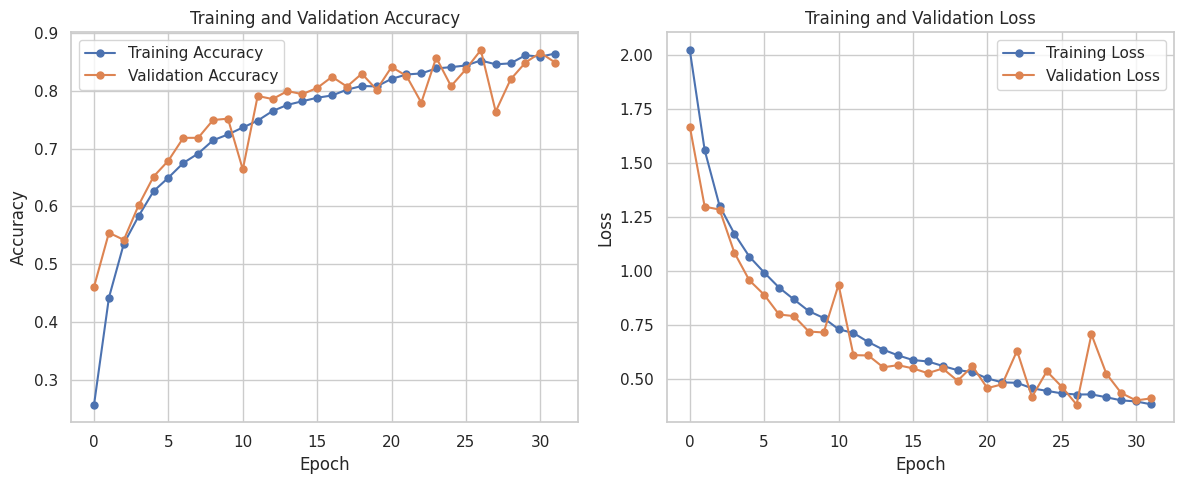

In [20]:
# The style
sns.set(style='whitegrid')

# Plotting training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o', markersize=5)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='-', marker='o', markersize=5)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o', markersize=5)
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='-', marker='o', markersize=5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### `evaluation and prediction`

In [21]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")


32/32 [==============================] - 1s 14ms/step - loss: 0.3958 - accuracy: 0.8520
Test Accuracy: 85.20%
Test Loss: 0.3958


In [22]:
# The Prediction
prediction = model.predict(X_test)
prediction

32/32 [==============================] - 0s 9ms/step


array([[8.8570160e-01, 2.1093739e-03, 6.1488431e-04, ..., 1.1165628e-04,
        1.2128870e-02, 5.3360391e-02],
       [8.8228822e-02, 3.2659369e-05, 5.3770667e-01, ..., 4.5451793e-09,
        8.3235773e-04, 1.0792347e-04],
       [6.5710819e-01, 1.8041989e-07, 3.2301304e-01, ..., 7.4279662e-09,
        3.7425326e-04, 1.4798539e-03],
       ...,
       [1.1915592e-05, 1.1750457e-06, 4.5558909e-06, ..., 1.6664387e-11,
        8.6308933e-07, 9.9840862e-01],
       [1.9160159e-04, 4.9297852e-03, 5.2814554e-05, ..., 2.1571516e-06,
        7.2996010e-04, 9.9186462e-01],
       [1.8552782e-05, 1.7040674e-01, 2.7229477e-04, ..., 1.1884643e-05,
        7.9256686e-05, 7.6860070e-01]], dtype=float32)

## Predictions

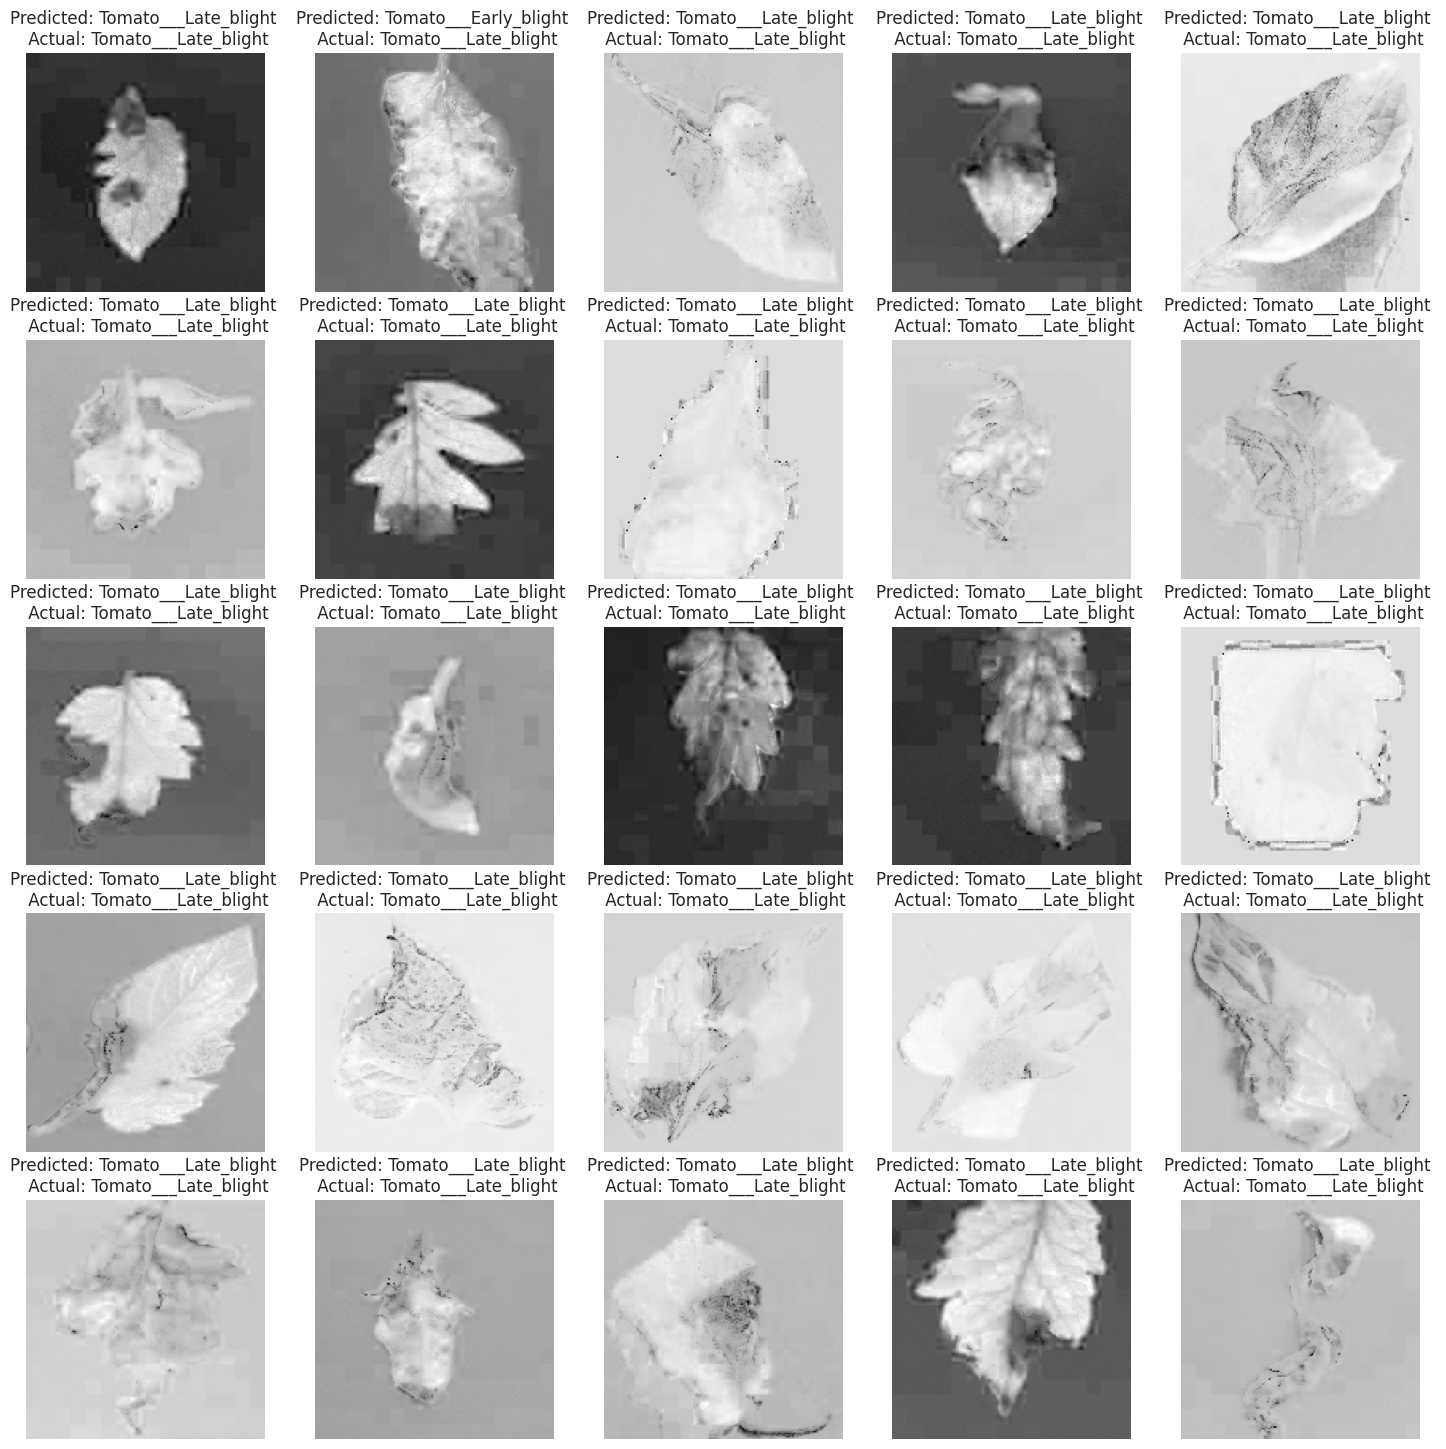

In [23]:
# Function to get label names
def get_label_name(label):
    class_names = Categories
    return class_names[label]

# Plotting the grayscale images with predicted and actual labels
plt.figure(figsize=(18, 18))

for i in range(min(25, len(X_test))):
    plt.subplot(5, 5, i+1)
    grayscale_image = np.dot(X_test[i][...,:3], [0.299, 0.587, 0.114])
    plt.imshow(grayscale_image, cmap='gray')  
    plt.axis('off')  
    
    predicted_label = np.argmax(prediction[i])
    actual_label = y_test[i]

    title = f"Predicted: {get_label_name(predicted_label)} \n Actual: {get_label_name(actual_label)}"
    plt.title(title)

plt.show()

In [24]:
predictions = []
for i in range(len(prediction)):
    predictions.append(np.argmax(prediction[i]))
print(predictions[:20])

[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


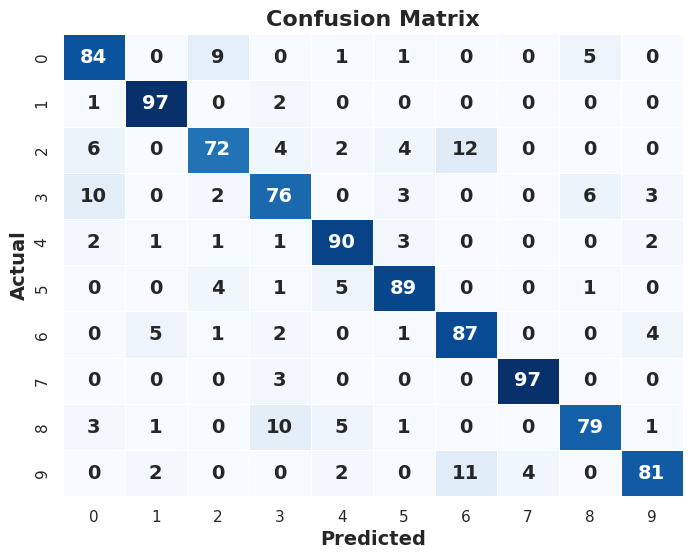

In [25]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, predictions)
# Create a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14, 'weight': 'bold'}, linewidths=.5)

# Customize labels and title
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

In [26]:
print("\033[1mThe Classification Report on Test Data\033[0m\n")
classification_rep = classification_report(y_test, predictions)
print(classification_rep)

The Classification Report on Test Data

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.92      0.97      0.94       100
           2       0.81      0.72      0.76       100
           3       0.77      0.76      0.76       100
           4       0.86      0.90      0.88       100
           5       0.87      0.89      0.88       100
           6       0.79      0.87      0.83       100
           7       0.96      0.97      0.97       100
           8       0.87      0.79      0.83       100
           9       0.89      0.81      0.85       100

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



# By: Mohammed Hamza